#  ENSEMBLE LEARNING FOR SENTIMENT ANALYSIS






# ***Data-set description***
***Data Set Name:*** Uber Customer Reviews.csv

***Source:*** Google Play Store

***Purpose:*** Sentiment Analysis

***Format:*** CSV (Comma-Separated Values)

***Size:*** 18764 rows × 6 columns (112584 datas)

#*****Columns:*****



1.   "review_id"  A unique identifier for each review.

2.   "user_name"  The username of the person who left the review.

3.   "tex"  The main text of the review.

4.   "rating"  The rating given by the user (e.g., 1 to 5 stars).

5.   "review_date" The date when the review was posted.

6.   "appVersion" The version of the Uber app that the user was using when they left the review.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Installing necessary packages***

In [ ]:
!pip install nltk
!pip install emoji
!pip install pyspellchecker
!pip install transformers
!pip install contractions
!pip install language-tool-python
!pip install google-cloud-aiplatform


# ***Importing neccesery librarys***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import emoji
import contractions
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import BartForConditionalGeneration, BartTokenizer
from nltk import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# ***Loading the data set***

In [ ]:
# reading csv file
df=pd.read_csv('/content/drive/MyDrive/uber_customer_reviews.csv')

***Data cleaning***

In [ ]:
df.sample(10)

,review_id,user_name,text,rating,review_date,appVersion
15811,07c7fe46-26fd-4ec8-8a77-a20a157122ed,nadeem dawood,Very good service when ever we want it come,5.0,15-07-2023 17:42,4.482.10000
1761,3d059304-623b-40b6-9262-e5c632110cc4,Farhan Shariar,Disgusting,1.0,07-08-2023 15:32,4.484.10000
11345,f4649f35-28ed-49b1-ac28-4e5ea6ee42ae,CISCO'S WORLD,Perfect trip Great druver,5.0,22-07-2023 17:45,4.483.10000
3078,0b3a570a-c1ca-435f-94b7-a0781e8e2aa6,Chetn K,Fantastic,5.0,05-08-2023 09:58,4.479.10001
818,42e673c8-0fc5-45c1-868a-308a72183374,Rajveer sain,Comfortable ride,5.0,09-08-2023 09:23,4.481.10002
15966,ffb348d1-8dbd-4ca2-9115-2f187ef9fe2d,David Foulk,"Pleasant,on time and comfortable",5.0,15-07-2023 13:13,4.482.10000
11428,9fca2d70-80aa-4b7c-8f2b-e09beac811a6,Kenneth Jackson,Good 👍,5.0,22-07-2023 14:46,4.483.10000
510,c86ba376-e0bb-4418-aff2-94e2da4a4290,Kamala Valli,These people don't send any invoice number to ...,1.0,09-08-2023 20:10,4.481.10002
13686,19bbc4ac-1766-45cf-a312-0c4a4073f0ac,Sarvesh Baranwal,Good,3.0,18-07-2023 23:28,4.482.10000
9879,7185c520-7f69-4dea-9fc4-8588981ba7a3,Marilyn Stucker,Too notch,5.0,25-07-2023 00:56,4.483.10000


In [ ]:
df.shape

(18764, 6)

In [ ]:
df.info()

In [ ]:
# Missing Value
df.isnull().sum()

review_id         0
user_name         1
text              2
rating            1
review_date       1
appVersion     3392
dtype: int64

In [ ]:

df.duplicated().sum()

0

In [ ]:

df.dropna(subset=['text'], inplace=True)


df.to_csv("/content/drive/MyDrive/preprocess1_reviews.csv", index=False)


# ***Feature extraction***

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/preprocess1_reviews.csv')
df['review_date'] = pd.to_datetime(df['review_date'])
df['year'] = df['review_date'].dt.year
df['month'] = df['review_date'].dt.month
df['day'] = df['review_date'].dt.day
df['time'] = df['review_date'].dt.time
df.to_csv("/content/drive/MyDrive/preprocess2_reviews.csv", index=False)


# ***Data transfermation***

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/preprocess2_reviews.csv")

# Define the version to numeric conversion function
def version_to_numeric(version_str):
    # Check if the value is NaN or not a string
    if pd.isna(version_str) or not isinstance(version_str, str):
        return version_str  # Return NaN or the original value

    version_parts = version_str.split('.')
    version_parts = [int(part) for part in version_parts]
    numerical_value = 0
    for i, part in enumerate(reversed(version_parts)):
        numerical_value += part * (10 ** i)
    return numerical_value

df['appVersionNumeric'] = df['appVersion'].apply(version_to_numeric)


mode_appVersionNumeric = df['appVersionNumeric'].mode().iloc[0]
df['appVersionNumeric'].fillna(mode_appVersionNumeric, inplace=True)

# Save the modified DataFrame to a new CSV file
df.to_csv("/content/drive/MyDrive/preprocess3_reviews.csv", index=False)

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

# Load the CSV file
csv_file = "/content/drive/MyDrive/preprocess3_reviews.csv"
df = pd.read_csv(csv_file)

# Initialize the SpellChecker
spell = SpellChecker()

# Get a set of English words
english_words = set(words.words())

# Define a function for text preprocessing
def preprocess_text(text):
    # Check for NaN and empty strings
    if pd.isna(text) or text == "":
        return ""

    # Step 1: Lowercasing
    text = text.lower()

    # Step 2: Removing HTML Tags
    text = re.sub(r'<.*?>', '', text)

    # Step 3: Expand Contractions
    text = contractions.fix(text)

    # Step 4: Tokenization and Symbol Removal
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in word_tokenize(text)]

    # Step 5: Stop Word Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Step 6: Handling Emojis and Emoticons
    tokens = [emoji.demojize(word) for word in tokens]

    # Step 7: Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Step 8: Language Check and Spelling Correction
    corrected_tokens = []
    for word in tokens:
        try:
            correction = spell.correction(word)
            if correction:  # Check if the correction is not empty
                corrected_tokens.append(correction)  # Use the corrected word
            else:
                corrected_tokens.append(word)  # Use the original word if no correction found
        except Exception as e:
            corrected_tokens.append(word)  # Use the original word in case of any exception

    # Step 9: Filter out non-English words
    english_tokens = [word for word in corrected_tokens if word in english_words]

    # Rejoin the processed tokens into a single string
    return ' '.join(english_tokens)

# Specify the columns containing text data to preprocess
columns_to_preprocess = ['text']

# Apply the preprocessing function to the specified columns
for col in columns_to_preprocess:
    df[col] = df[col].apply(preprocess_text)

# Combine the preprocessed text columns into a single text column
df['combined_text'] = df[columns_to_preprocess].apply(lambda x: ' '.join(x), axis=1)

# Remove the word "i" from the combined_text column
df['combined_text'] = df['combined_text'].str.replace(r'\b[iI]\b', '', regex=True)
# Drop rows with NaN values in the 'text' and 'combined_text' columns
df = df.dropna(subset=['text', 'combined_text'])

# Save the preprocessed data to a new CSV file if needed
df.to_csv("/content/drive/MyDrive/text_preprocessed.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# ***Creating word cloud for text_preprocessed data***

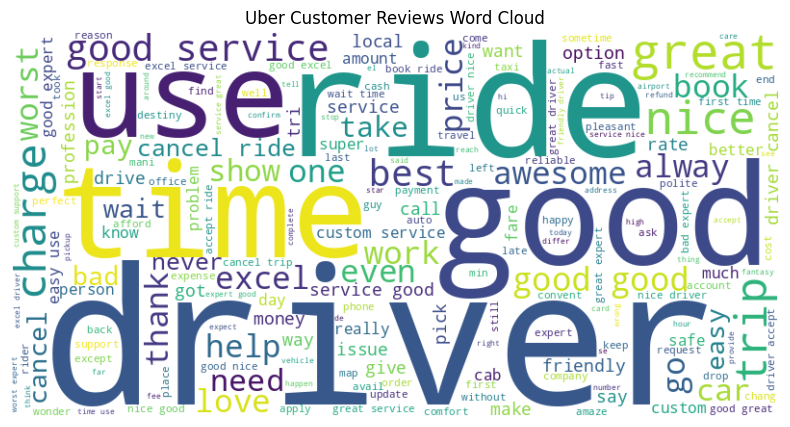

In [ ]:
csv_file = "/content/drive/MyDrive/text_preprocessed.csv"
df = pd.read_csv(csv_file)

# Handle NaN values in the 'combined_text' column and convert them to empty strings
df['combined_text'] = df['combined_text'].fillna('')

# Combine preprocessed text from all reviews into a single string
all_reviews_text = ' '.join(df['combined_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Uber Customer Reviews Word Cloud")
plt.show()

# ***TOP 10 WORDS IN TEXT***

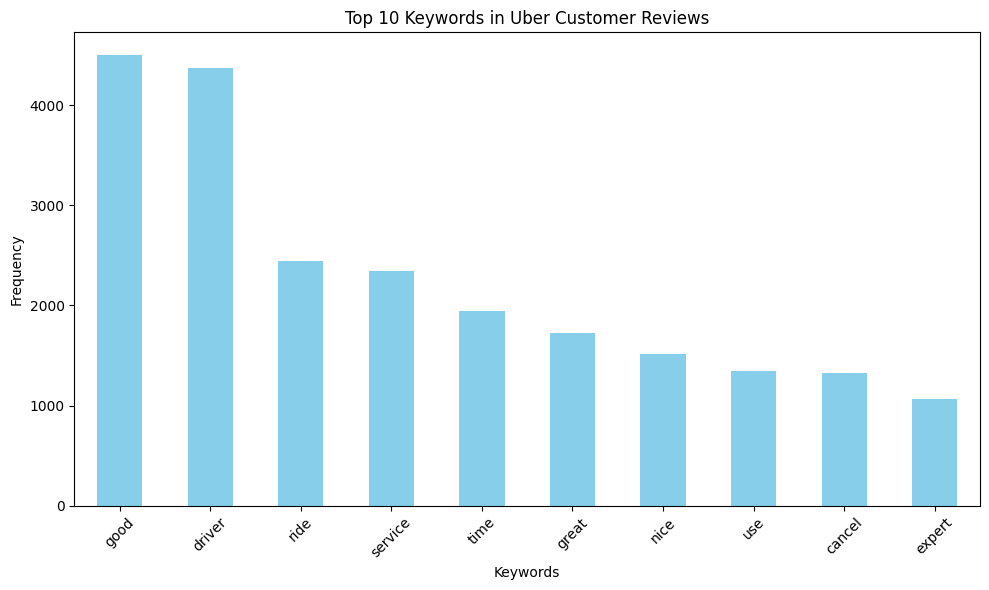

In [ ]:
# Load the preprocessed data
csv_file = "/content/drive/MyDrive/text_preprocessed.csv"
df = pd.read_csv(csv_file)

# Handle NaN values in the 'combined_text' column and convert them to empty strings
df['combined_text'] = df['combined_text'].fillna('')

# Combine preprocessed text from all reviews into a single string
all_reviews_text = ' '.join(df['combined_text'])

# Tokenize the text into words
words = all_reviews_text.split()
ord_freq = pd.Series(words).value_counts()
top_n_keywords = 10 

# Get the top keywords
top_keywords = word_freq.head(top_n_keywords)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n_keywords} Keywords in Uber Customer Reviews')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# ***Finding sentiment score and Data labeling***

In [ ]:
nltk.download('vader_lexicon')

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/text_preprocessed.csv')

#  mention the column that contain text
text_column = 'combined_text'

# Replace missing values with empty strings
df[text_column].fillna('', inplace=True)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores using VADER
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply the sentiment analysis function to the preprocessed text column
df['sentiment'] = df[text_column].apply(get_sentiment_score)

df['compound_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])

threshold = 0.1

# Categorize sentiment based on the threshold
df['sentiment_label'] = df['compound_sentiment'].apply(
    lambda score: 'positive' if score > threshold else ('negative' if score < -threshold else 'neutral')
)

# Define a function to map sentiment labels to numerical values
def map_sentiment_to_numeric(sentiment_label):
    if sentiment_label == 'positive':
        return 1
    elif sentiment_label == 'neutral':
        return 0
    elif sentiment_label == 'negative':
        return -1
    else:
        return None  # Handle any other values if necessary

# Apply the mapping function to the 'sentiment_label' column
df['numeric_sentiment'] = df['sentiment_label'].apply(map_sentiment_to_numeric)
df.dropna(subset=['combined_text', 'sentiment_label', 'compound_sentiment','numeric_sentiment'], inplace=True)

# Save the DataFrame with sentiment labels and numeric sentiment to a new CSV file
df.to_csv('/content/drive/MyDrive/preprocessed_data_with_sentiment.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# ***Sentiment distribution***




In [ ]:
df

,review_id,user_name,text,rating,review_date,appVersion,year,month,day,time,appVersionNumeric,combined_text,sentiment,compound_sentiment,sentiment_label,numeric_sentiment
0,18d6584c-d0e9-4833-a744-f607058aee97,Milky Way,suddenly i driver local call ask go i really a...,1.0,2023-10-08 17:48:00,NaN,2023,10,8,17:48:00,15230.0,suddenly driver local call ask go really annoy,"{'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'comp...",-0.4927,negative,-1
1,50a08f18-cece-4ddf-b617-028844c8aa28,Bradlee Severa,cordial i help quick turnaround ride i well done,5.0,2023-10-08 17:38:00,4.485.10000,2023,10,8,17:38:00,15250.0,cordial help quick turnaround ride well done,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.5859,positive,1
2,b0d8e75a-80a7-4dcd-abaf-72b046dbeeb7,Amit Aggarwal,good expert,5.0,2023-10-08 17:38:00,4.486.10002,2023,10,8,17:38:00,15262.0,good expert,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive,1
3,502702a9-25ed-4373-a96c-7fa1f06caacd,Bryant Inman,use,5.0,2023-10-08 17:37:00,4.467.10008,2023,10,8,17:37:00,15078.0,use,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
4,f47a3fb6-23db-49bd-9e63-f33c8d724d07,Addie Whittaker,enjoy travel driver polite good conversational...,5.0,2023-10-08 17:36:00,4.486.10002,2023,10,8,17:36:00,15262.0,enjoy travel driver polite good conversational...,"{'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'comp...",0.8779,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18757,e2568470-ba43-4b70-9613-fd8147d37cd7,Basudev Basu Chowdhary,time i drive airport smooth,5.0,2023-11-07 03:55:00,4.481.10002,2023,11,7,03:55:00,15212.0,time drive airport smooth,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
18758,2648eef2-96af-4b20-a0d9-2816c35bf1da,lala bhardwaj,ride cancel without inform poor service,1.0,2023-11-07 03:51:00,4.481.10002,2023,11,7,03:51:00,15212.0,ride cancel without inform poor service,"{'neg': 0.234, 'neu': 0.468, 'pos': 0.299, 'co...",0.1416,positive,1
18759,d151de7b-1447-4b2e-b8e7-03592fb5aeb8,kapila praveen,driver rude want cash accept payment use servi...,1.0,2023-11-07 03:50:00,4.436.10000,2023,11,7,03:50:00,14760.0,driver rude want cash accept payment use servi...,"{'neg': 0.272, 'neu': 0.46, 'pos': 0.268, 'com...",-0.2732,negative,-1
18760,cc835e2c-eafc-45d8-a403-f5baec1d8895,Haseeb Ahmed,great expert,5.0,2023-11-07 03:45:00,4.471.10000,2023,11,7,03:45:00,15110.0,great expert,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive,1


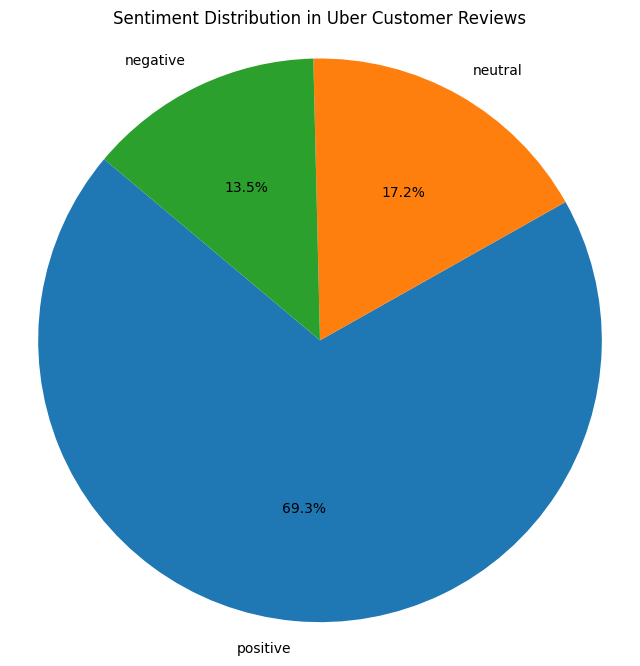

In [ ]:
# Load the preprocessed data with sentiment labels
csv_file = "/content/drive/MyDrive/preprocessed_data_with_sentiment.csv"
df = pd.read_csv(csv_file)


# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in Uber Customer Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# ***Top ten words in negative sentiment***

<ipython-input-19-c0c261d2a2f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['combined_text'] = negative_df['combined_text'].fillna('')


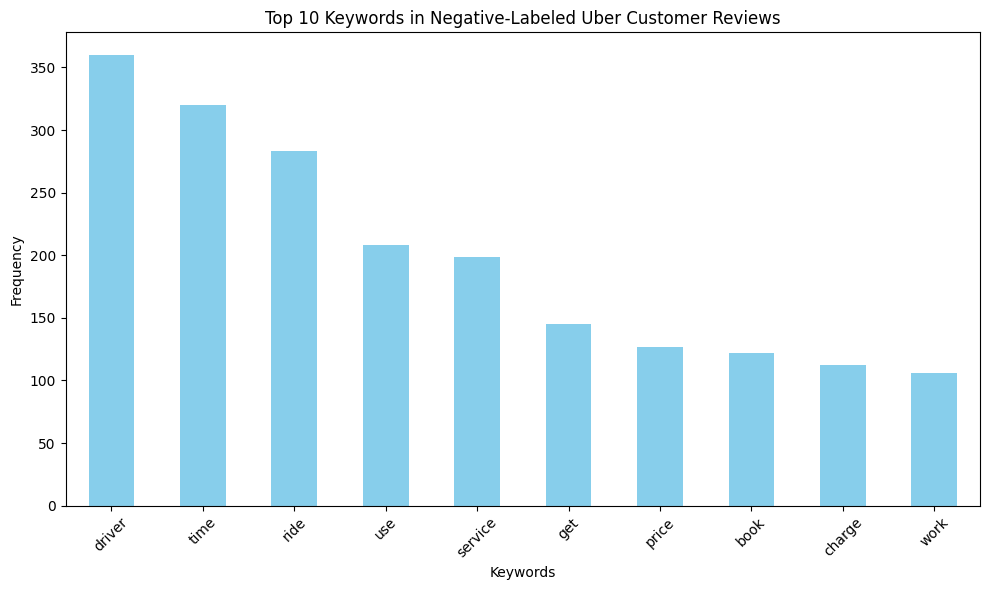

In [ ]:
# Load the preprocessed data
csv_file = "/content/drive/MyDrive/preprocessed_data_with_sentiment.csv"
df = pd.read_csv(csv_file)

# Filter the DataFrame to select only negative-labeled reviews (assuming sentiment_label 0 represents negative sentiment)
negative_df = df[df['numeric_sentiment'] == 0]

# Handle NaN values in the 'combined_text' column and convert them to empty strings
negative_df['combined_text'] = negative_df['combined_text'].fillna('')

# Combine preprocessed text from all negative reviews into a single string
negative_reviews_text = ' '.join(negative_df['combined_text'])

# Tokenize the text into words
words = negative_reviews_text.split()

# Create a frequency distribution of words
word_freq = pd.Series(words).value_counts()

# Set the number of top keywords you want to display in the bar chart
top_n_keywords = 10  # Adjust this number as needed

# Get the top keywords
top_keywords = word_freq.head(top_n_keywords)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n_keywords} Keywords in Negative-Labeled Uber Customer Reviews')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Word cloud for negative sentiment***

<ipython-input-20-fdcee554c5ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['combined_text'] = negative_df['combined_text'].fillna('')


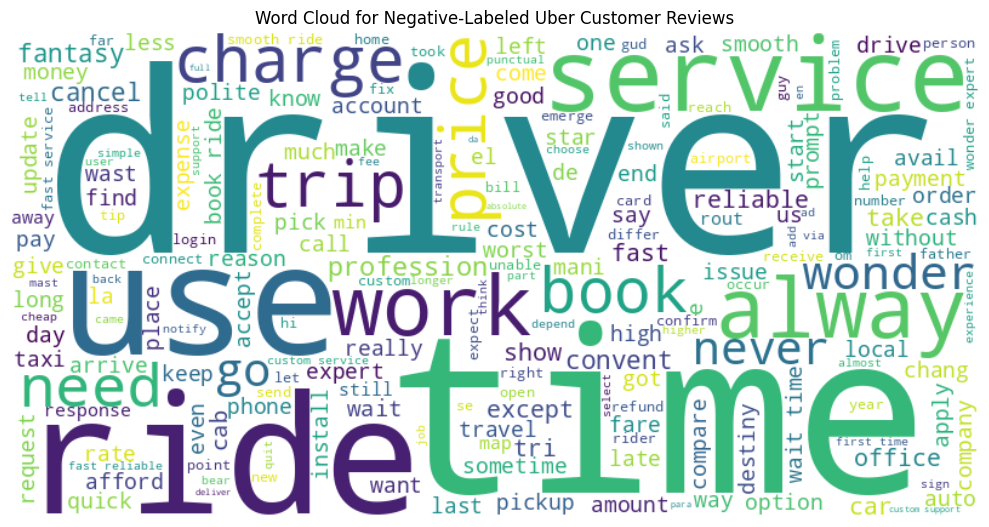

In [ ]:
# Load the preprocessed data
csv_file = "/content/drive/MyDrive/preprocessed_data_with_sentiment.csv"
df = pd.read_csv(csv_file)

# Filter the DataFrame to select only negative-labeled reviews (assuming sentiment_label 0 represents negative sentiment)
negative_df = df[df['numeric_sentiment'] == 0]

# Handle NaN values in the 'combined_text' column and convert them to empty strings
negative_df['combined_text'] = negative_df['combined_text'].fillna('')

# Combine preprocessed text from all negative reviews into a single string
negative_reviews_text = ' '.join(negative_df['combined_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative-Labeled Uber Customer Reviews')
plt.axis('off')  # Turn off axis labels and ticks
plt.tight_layout()
plt.show()


# MODEL BUILDING

**SVM**

In [ ]:
# Load the CSV file with sentiment scores and labels
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data_with_sentiment.csv')

# Drop rows with missing values in 'combined_text' or 'sentiment_label' columns
df.dropna(subset=['combined_text', 'sentiment_label'], inplace=True)

# Split the data into training and testing sets
X = df['combined_text']  # Text data
y = df['sentiment_label']  # Sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.946204259967231
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.88      0.86       513
     neutral       0.88      0.90      0.89       529
    positive       0.98      0.97      0.97      2620

    accuracy                           0.95      3662
   macro avg       0.90      0.91      0.91      3662
weighted avg       0.95      0.95      0.95      3662



**MULTIPLE MODELS**

In [ ]:


# Load the CSV file with sentiment scores and labels
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data_with_sentiment.csv')

# Drop rows with missing values in 'combined_text' or 'sentiment_label' columns
df.dropna(subset=['combined_text', 'sentiment_label'], inplace=True)

# Split the data into training and testing sets
X = df['combined_text']  # Text data
y = df['sentiment_label']  # Sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set using Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Initialize and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set using Decision Tree
y_pred_dt = dt_classifier.predict(X_test_tfidf)

# Evaluate the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Naive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)

print("\nDecision Tree Classifier Results:")
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:\n", classification_rep_dt)

print("\nSVM Classifier Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)


Naive Bayes Classifier Results:
Accuracy: 0.818405243036592
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.80      0.75       513
     neutral       0.75      0.15      0.25       529
    positive       0.84      0.96      0.90      2620

    accuracy                           0.82      3662
   macro avg       0.77      0.64      0.63      3662
weighted avg       0.81      0.82      0.78      3662


Decision Tree Classifier Results:
Accuracy: 0.926815947569634
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.81      0.81       513
     neutral       0.86      0.89      0.87       529
    positive       0.97      0.96      0.96      2620

    accuracy                           0.93      3662
   macro avg       0.87      0.89      0.88      3662
weighted avg       0.93      0.93      0.93      3662


SVM Classifier Results:
Accuracy: 0.946204259967231
Classification

**ENSAMBLE MODEL**

In [ ]:


# Load the CSV file with sentiment scores and labels
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data_with_sentiment.csv')

# Drop rows with missing values in 'combined_text' or 'sentiment_label' columns
df.dropna(subset=['combined_text', 'sentiment_label'], inplace=True)

# Split the data into training and testing sets
X = df['combined_text']  # Text data
y = df['sentiment_label']  # Sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the individual classifiers
nb_classifier = MultinomialNB()
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Create a Voting Classifier as an ensemble
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('dt', dt_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'hard' for majority class voting

# Train the ensemble classifier
ensemble_classifier.fit(X_train_tfidf, y_train)

# Save the ensemble classifier to a file using pickle
with open('ensemble_classifier.pkl', 'wb') as file:
    pickle.dump(ensemble_classifier, file)


# Make predictions on the test set using the ensemble classifier
y_pred_ensemble = ensemble_classifier.predict(X_test_tfidf)

# Evaluate the ensemble classifier
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble)

print("Ensemble Classifier Results:")
print(f"Accuracy: {accuracy_ensemble}")
print("Classification Report:\n", classification_rep_ensemble)


Ensemble Classifier Results:
Accuracy: 0.9448388858547242
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.92      0.85       513
     neutral       0.93      0.87      0.90       529
    positive       0.98      0.97      0.97      2620

    accuracy                           0.94      3662
   macro avg       0.90      0.92      0.91      3662
weighted avg       0.95      0.94      0.95      3662



# ***Model deployment***

In [ ]:
from nltk.corpus import words
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
# Load the CSV file
csv_file = "/content/drive/MyDrive/Ola_Customer_Reviews.csv"
df1 = pd.read_csv(csv_file)

# Get a set of English words
english_words = set(words.words())

# Define a function for text preprocessing
def preprocess_text(text):
    # Check for NaN and empty strings
    if pd.isna(text) or text == "":
        return ""

    # Step 1: Lowercasing
    text = text.lower()

    # Step 2: Removing HTML Tags
    text = re.sub(r'<.*?>', '', text)

    # Step 3: Tokenization and Symbol Removal
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in word_tokenize(text)]

    # Step 4: Stop Word Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Handling Emojis and Emoticons
    tokens = [emoji.demojize(word) for word in tokens]

    # Step 6: Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Step 8: Filter out non-English words
    english_tokens = [word for word in tokens if word in english_words]

    # Rejoin the processed tokens into a single string
    return ' '.join(english_tokens)

# Specify the columns containing text data to preprocess
columns_to_preprocess = ['text']

# Apply the preprocessing function to the specified columns
for col in columns_to_preprocess:
    df1[col] = df1[col].apply(preprocess_text)
df1['combined_text'] = df1[columns_to_preprocess].apply(lambda x: ' '.join(x), axis=1)

df1['combined_text'] = df1['combined_text'].str.replace(r'\b[iI]\b', '', regex=True)

df1 = df1.dropna(subset=['text', 'combined_text'])

df1.to_csv("/content/drive/MyDrive/ola_text_preprocessed.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df1

,review_id,text,review_date,appVersion,combined_text
0,fbc7ffc9-5a89-446e-87fd-d69bf4a7f984,map mess pay extra map incorrect request fix soon,10-08-2023 16:40,6.3.2,map mess pay extra map incorrect request fix soon
1,5a0051fb-220a-45b2-ba94-a15a2949218f,,10-08-2023 16:36,NaN,
2,71ebf933-b734-474d-bb65-a18c90906ed2,aa wait hour wast pali store,10-08-2023 16:29,6.3.1,aa wait hour wast pali store
3,e1cc0010-60b3-4126-99c2-e8549088566a,worst,10-08-2023 15:52,5.0.4,worst
4,77cf1be1-b428-4493-ae25-e0f288f79b8f,much tri cheap ride offer rout,10-08-2023 15:51,NaN,much tri cheap ride offer rout
...,...,...,...,...,...
357677,575258ed-aec1-47ea-b792-88deb17e4ad7,useless new user ca sign code,08-03-2015 04:33,NaN,useless new user ca sign code
357678,ca91ebc0-92d9-48a6-9c46-7dcad1a0546e,money money n dint get reflect deduct account ...,02-03-2015 23:13,NaN,money money n dint get reflect deduct account ...
357679,f7227b64-90aa-4c82-996e-c86d99761831,later get code open clue go need learn net res...,02-03-2015 11:52,NaN,later get code open clue go need learn net res...
357680,5f14c66e-94cc-4594-a83e-055ab8721ca8,one worst tri time never work concept recommen...,17-02-2015 15:17,NaN,one worst tri time never work concept recommen...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function for making predictions on new data
def predict_sentiments_on_new_data(new_data_file, output_file, tfidf_vectorizer, ensemble_classifier):
    # Load the new CSV file with data for prediction
    new_data_df = pd.read_csv(new_data_file)

    # Preprocess the new data, including handling missing values
    new_data_df['combined_text'].fillna('', inplace=True)  # Fill missing values with an empty string

    # 'combined_text' column for text data, preprocess it with TF-IDF
    new_text_data = new_data_df['combined_text']
    new_text_tfidf = tfidf_vectorizer.transform(new_text_data)

    # Make predictions on the new data using the ensemble classifier
    new_predictions = ensemble_classifier.predict(new_text_tfidf)

    # Add the predictions to the new data DataFrame
    new_data_df['predicted_sentiment'] = new_predictions

    # Save the DataFrame to a new CSV file
    new_data_df.to_csv(output_file, index=False)  # Save the predictions to a CSV file

# Specify the paths for the new data file and the output file
new_data_file = '/content/drive/MyDrive/ola_text_preprocessed.csv'
output_file = '/content/drive/MyDrive/predictions_for_new_data.csv'

# Call the function to predict sentiments and save the results
predict_sentiments_on_new_data(new_data_file, output_file, tfidf_vectorizer, ensemble_classifier)


In [ ]:
new_data_df=pd.read_csv('/content/drive/MyDrive/predictions_for_new_data.csv')

In [ ]:
new_data_df.dropna()

,review_id,text,review_date,appVersion,combined_text,predicted_sentiment
0,fbc7ffc9-5a89-446e-87fd-d69bf4a7f984,map mess pay extra map incorrect request fix soon,10-08-2023 16:40,6.3.2,map mess pay extra map incorrect request fix soon,negative
2,71ebf933-b734-474d-bb65-a18c90906ed2,aa wait hour wast pali store,10-08-2023 16:29,6.3.1,aa wait hour wast pali store,neutral
3,e1cc0010-60b3-4126-99c2-e8549088566a,worst,10-08-2023 15:52,5.0.4,worst,negative
6,59d7c2f2-05fa-4cff-b92e-3ba8659ad365,option contact one problem rais virtual assist...,10-08-2023 15:14,6.3.2,option contact one problem rais virtual assist...,positive
8,3e2a79ed-6b75-4bf4-a94a-667ebb9fd025,fraud fare final fare almost regard alway trip...,10-08-2023 14:54,6.1.6,fraud fare final fare almost regard alway trip...,negative
...,...,...,...,...,...,...
356780,153d6035-3349-4c83-8df3-b20030eb3e6b,thank u,11-02-2018 13:20,4.5.5,thank u,positive
356783,3dafc336-c941-4e20-830f-8584c877e24e,use price still driver extra money,11-02-2018 13:13,4.5.2,use price still driver extra money,negative
356787,a05833a0-72dc-47a9-b8e0-b4ce1984abd9,yesterday think book cab reach time,11-02-2018 12:44,4.5.2,yesterday think book cab reach time,neutral
356788,fd42b02d-5e67-4161-a25f-d0faa2f3e30f,suggest driver delay trip car like ga fill tyr...,11-02-2018 12:32,4.5.4,suggest driver delay trip car like ga fill tyr...,negative


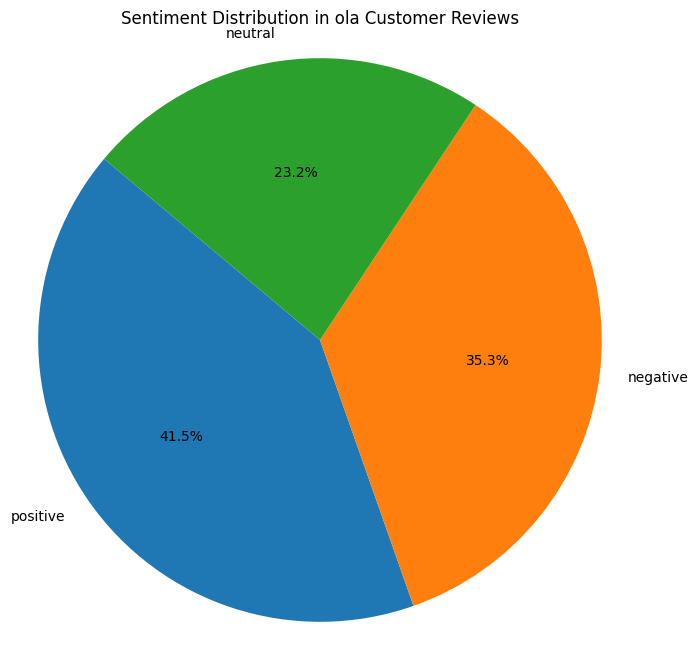

In [ ]:
# Load the preprocessed data with sentiment labels
csv_file = "/content/drive/MyDrive/predictions_for_new_data.csv"
df = pd.read_csv(csv_file)


# Count the number of reviews in each sentiment category
sentiment_counts = df['predicted_sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in ola Customer Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df

,review_id,text,review_date,appVersion,combined_text,predicted_sentiment
0,fbc7ffc9-5a89-446e-87fd-d69bf4a7f984,map mess pay extra map incorrect request fix soon,10-08-2023 16:40,6.3.2,map mess pay extra map incorrect request fix soon,negative
1,5a0051fb-220a-45b2-ba94-a15a2949218f,NaN,10-08-2023 16:36,NaN,NaN,neutral
2,71ebf933-b734-474d-bb65-a18c90906ed2,aa wait hour wast pali store,10-08-2023 16:29,6.3.1,aa wait hour wast pali store,neutral
3,e1cc0010-60b3-4126-99c2-e8549088566a,worst,10-08-2023 15:52,5.0.4,worst,negative
4,77cf1be1-b428-4493-ae25-e0f288f79b8f,much tri cheap ride offer rout,10-08-2023 15:51,NaN,much tri cheap ride offer rout,neutral
...,...,...,...,...,...,...
357677,575258ed-aec1-47ea-b792-88deb17e4ad7,useless new user ca sign code,08-03-2015 04:33,NaN,useless new user ca sign code,negative
357678,ca91ebc0-92d9-48a6-9c46-7dcad1a0546e,money money n dint get reflect deduct account ...,02-03-2015 23:13,NaN,money money n dint get reflect deduct account ...,negative
357679,f7227b64-90aa-4c82-996e-c86d99761831,later get code open clue go need learn net res...,02-03-2015 11:52,NaN,later get code open clue go need learn net res...,positive
357680,5f14c66e-94cc-4594-a83e-055ab8721ca8,one worst tri time never work concept recommen...,17-02-2015 15:17,NaN,one worst tri time never work concept recommen...,positive


<ipython-input-34-c3602fd706f2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['combined_text'] = negative_df['combined_text'].fillna('')


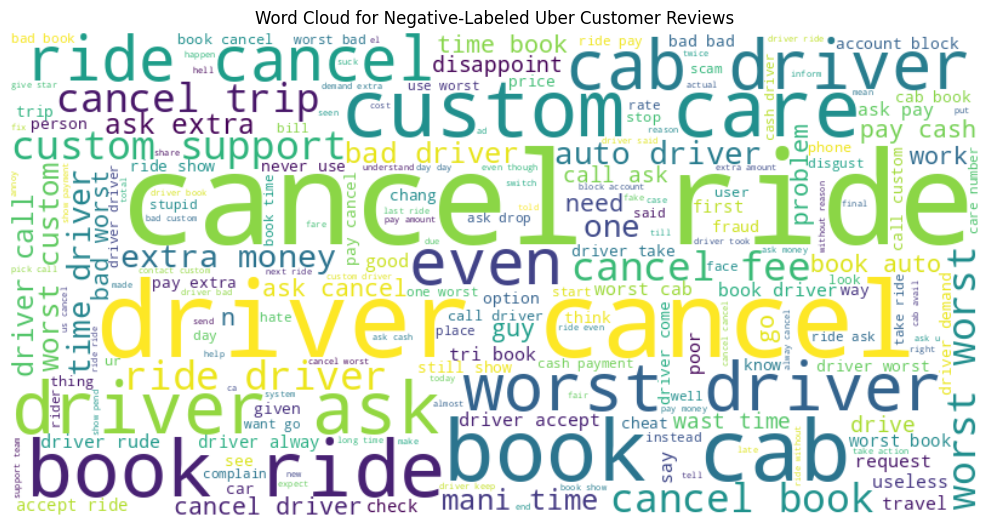

In [ ]:
# Load the preprocessed data
csv_file = "/content/drive/MyDrive/predictions_for_new_data.csv"
df = pd.read_csv(csv_file)

# Filter the DataFrame to select only negative-labeled reviews (assuming sentiment_label 0 represents negative sentiment)
negative_df = df[df['predicted_sentiment'] == 'negative']

# Handle NaN values in the 'combined_text' column and convert them to empty strings
negative_df['combined_text'] = negative_df['combined_text'].fillna('')

# Combine preprocessed text from all negative reviews into a single string
negative_reviews_text = ' '.join(negative_df['combined_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative-Labeled Uber Customer Reviews')
plt.axis('off')  # Turn off axis labels and ticks
plt.tight_layout()
plt.show()